# Lesson 1: Image Classification with Neural Networks

After going through Lesson 1 of Fast-ai Deep Learning course, I decided to practice what I learnt via training the resnet34 neural network on a dataset of [Sign Language Digits](https://github.com/ardamavi/Sign-Language-Digits-Dataset). Once the model is trained, it should be able to recognize the digit being represented via hand gesture correctly.

In [31]:
from fastai.vision import *
from fastai.metrics import error_rate

In [32]:
# We will specify the path for our dataset
path = Path('data/sign-lang-digits/Dataset')
path.ls()

[PosixPath('data/sign-lang-digits/Dataset/7'),
 PosixPath('data/sign-lang-digits/Dataset/2'),
 PosixPath('data/sign-lang-digits/Dataset/6'),
 PosixPath('data/sign-lang-digits/Dataset/0'),
 PosixPath('data/sign-lang-digits/Dataset/4'),
 PosixPath('data/sign-lang-digits/Dataset/5'),
 PosixPath('data/sign-lang-digits/Dataset/1'),
 PosixPath('data/sign-lang-digits/Dataset/9'),
 PosixPath('data/sign-lang-digits/Dataset/8'),
 PosixPath('data/sign-lang-digits/Dataset/models'),
 PosixPath('data/sign-lang-digits/Dataset/3')]

## Observing the data
Each folder is a number between 0 - 9 and contains images of the corresponding sign language digit. 

In [33]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
ds_tfms=get_transforms(), size=100).normalize(imagenet_stats) 

In [34]:
data.classes # Shows the categories

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

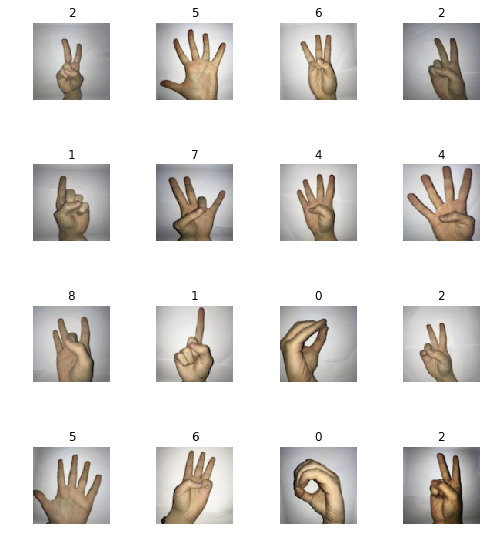

In [35]:
data.show_batch(rows=4, figsize=(7, 8))

# Training the model

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [39]:
learn.fit_one_cycle(4) # Fitting the model

epoch,train_loss,valid_loss,error_rate,time
0,0.588022,0.587713,0.182039,00:03
1,0.584916,0.481642,0.162621,00:03
2,0.536260,0.461662,0.155340,00:03
3,0.508764,0.455984,0.148058,00:03


In [40]:
learn.save('stage-1')

# Results

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idx = interp.top_losses()

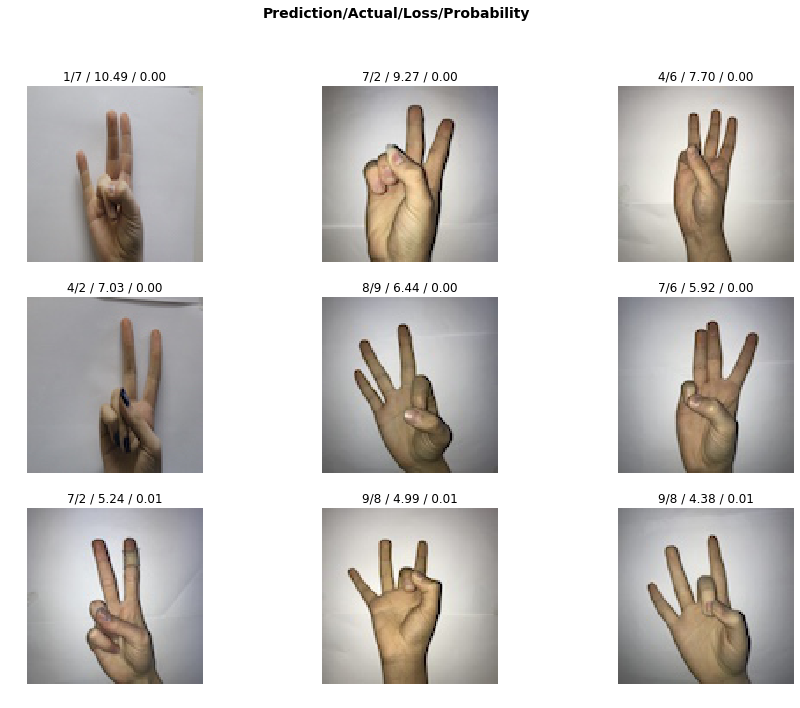

In [42]:
# Plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

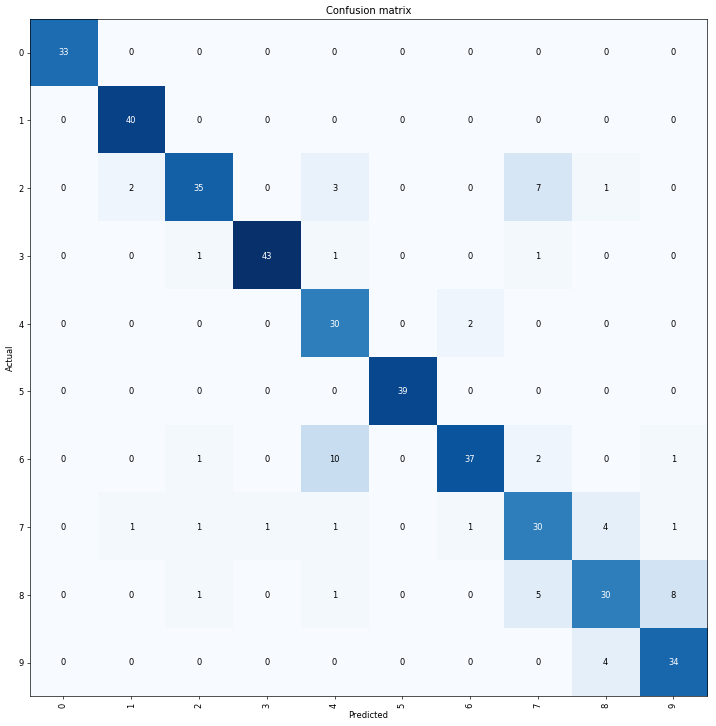

In [43]:
# Plot the confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [44]:
# List the most confused classifications 
interp.most_confused(min_val=2)

[('6', '4', 10),
 ('8', '9', 8),
 ('2', '7', 7),
 ('8', '7', 5),
 ('7', '8', 4),
 ('9', '8', 4),
 ('2', '4', 3),
 ('2', '1', 2),
 ('4', '6', 2),
 ('6', '7', 2)]

# Unfreezing & Fine-tuning the model

In [45]:
# First we will find the most optimum range of learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


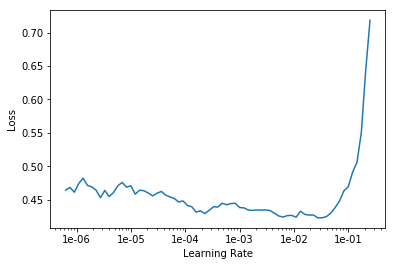

In [46]:
learn.recorder.plot()

The graph above shows loss is minimum for learning rates b/w 1e-4 to 1e-2
So we will use this range when fitting the model

In [47]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.561599,4.749340,0.337379,00:04
1,0.528140,1.365551,0.266990,00:03
2,0.381155,0.364569,0.109223,00:03
3,0.257347,0.065481,0.024272,00:03


We were able to drastically improve the performance of our prediction model!
In order to test out the model with custom images, I took 3 shots with my own camera for digits representing the numbers:
6, 3 & 9 to see how well the learner performs on a completely different set of images (The training and validation sets are almost all hands on white backgrounds)

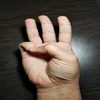

In [87]:
test_path = Path('data/sign-lang-digits/Test Images')
img6 = open_image(test_path/'digit-six.jpg')
img6 = img6.rotate(-90)
img6

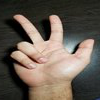

In [88]:
img3 = open_image(test_path/'digit-three.jpg')
img3 = img3.rotate(-90)
img3

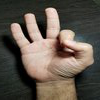

In [89]:
img9 = open_image(test_path/'digit-nine.jpg')
img9 = img9.rotate(-90)
img9

In [99]:
learn.predict(img6)[0] # Successfully predicts Category 6

Category tensor(6)

In [101]:
learn.predict(img3)[0] # Successsfully predicts Category 3

Category tensor(3)

In [102]:
learn.predict(img9)[0] # Incorrectly predicts 0

Category tensor(0)